# K-Nearest Neighbors in depth. Digits dataset


In this task we are going to perform a full analysis of the digits datatset provided by scikit learn followed by the implementation of K-Nearest neighbors model to predict the output of the type of the digit given some data.
The K-Nearest neighbors model is going to be trained in diferent ways so that we can see wich one give us the best results.

#### 1) Describe the dataset in dimensions such as number of features, number of categories, and number of samples per category using Python.

- First we are going to import some of the libraries that we are going to use to perform the excercice. 

In [164]:
# =============================================================================
# libraries
# =============================================================================

import numpy as np
import seaborn as sns
import collections
from matplotlib import pyplot as plt
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix

- Now that we have imported the libraries we are going to import the dataset and we are going to perform a first analysis and visulization of the number of features, number of clases and number of samples by categories.

In [165]:
from sklearn.datasets import load_digits
digits = load_digits()
X = digits.data
y = digits.target
columns = digits.feature_names

In the 'X' variable we have the features of the dataset and in the 'y' variable we have the output given the features of the 'X' data
Lest see the size of both of them

In [166]:
X.shape

(1797, 64)

In [167]:
y.shape

(1797,)

We can see that the features variable has a total of 64 features and a length of 1797 pacients, as it was expected we have 1797 solutions for each pacient in the output variable.

- Let´s see a quick visualization of the kind of images we are going to find

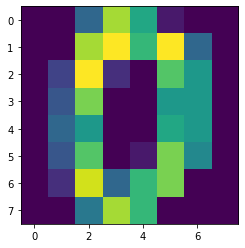

In [168]:
x_plot0 = np.reshape(X[0,:],(8,8))
plt.imshow(x_plot0)

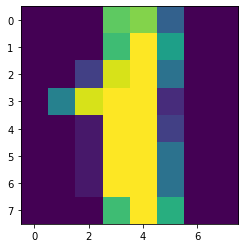

In [169]:
x_plot1 = np.reshape(X[1,:],(8,8))
plt.imshow(x_plot1)

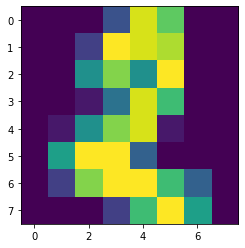

In [170]:
x_plot2 = np.reshape(X[2,:],(8,8))
plt.imshow(x_plot2)

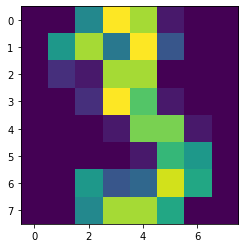

In [171]:
x_plot3 = np.reshape(X[3,:],(8,8))
plt.imshow(x_plot3)

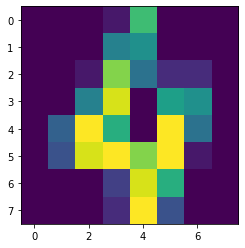

In [172]:
x_plot4 = np.reshape(X[4,:],(8,8))
plt.imshow(x_plot4)

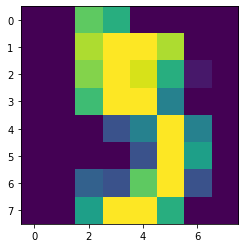

In [173]:
x_plot5 = np.reshape(X[5,:],(8,8))
plt.imshow(x_plot5)

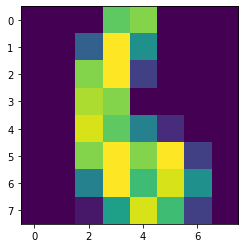

In [174]:
x_plot6 = np.reshape(X[6,:],(8,8))
plt.imshow(x_plot6)

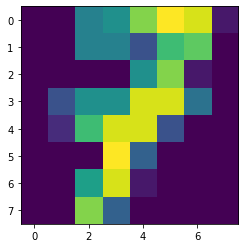

In [175]:
x_plot7 = np.reshape(X[7,:],(8,8))
plt.imshow(x_plot7)

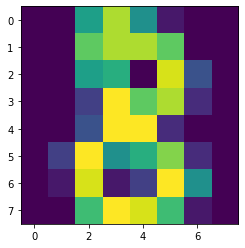

In [176]:
x_plot8= np.reshape(X[8,:],(8,8))
plt.imshow(x_plot8)

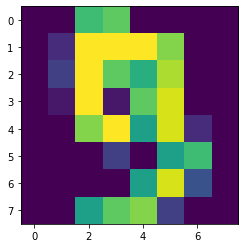

In [177]:
x_plot9 = np.reshape(X[9,:],(8,8))
plt.imshow(x_plot9)

- Now we are going to check the output of the dataset, that means the kind of class we are going to find in the output and how many samples are for each of them

In [178]:
print("Examples for each class: ", collections.Counter(y) )


Examples for each class:  Counter({3: 183, 1: 182, 5: 182, 4: 181, 6: 181, 9: 180, 7: 179, 0: 178, 2: 177, 8: 174})


C:\Users\franc\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

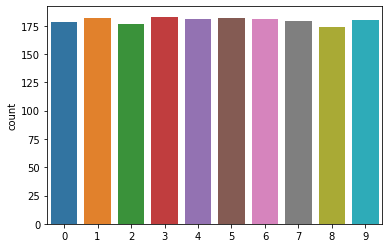

In [179]:
sns.countplot(y)

We can see that in this case that the clases are well balanced so in this case we could predict that a cross validation kind of training is going to be the best result

#### 2) Represent the statistical support of every feature graphically, resorting to Matplotlib’s boxplot function. Are there any outliers that can be detected by simple visual inspection? If so, devise a handcrafted method to detect and isolate such examples.

- Having clear wich is the main structure of our dataset, we are going to represent the statatistical support of every feature using Matplotlib´s boxplot function

{'whiskers': [<matplotlib.lines.Line2D at 0x2c04f2a7310>,
 'caps': [<matplotlib.lines.Line2D at 0x2c04f2a79d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c04f294f70>,
 'medians': [<matplotlib.lines.Line2D at 0x2c04f2b50d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x2c04f2b5430>,
 'means': []}

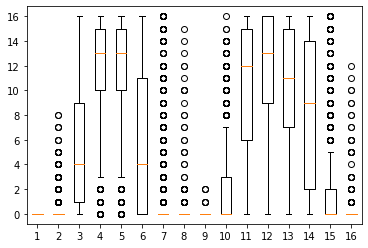

In [180]:
plt.boxplot(X[:,0:16])


{'whiskers': [<matplotlib.lines.Line2D at 0x2c04f440d00>,
 'caps': [<matplotlib.lines.Line2D at 0x2c04f451400>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c04f4409a0>,
 'medians': [<matplotlib.lines.Line2D at 0x2c04f451a90>,
 'fliers': [<matplotlib.lines.Line2D at 0x2c04f451dc0>,
 'means': []}

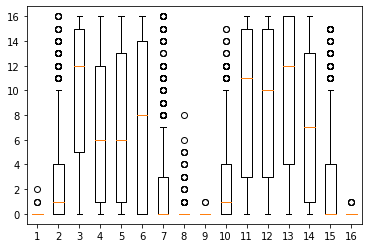

In [181]:
plt.boxplot(X[:,16:32])


{'whiskers': [<matplotlib.lines.Line2D at 0x2c04f5e96d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2c04f5e9dc0>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c04f5e9370>,
 'medians': [<matplotlib.lines.Line2D at 0x2c04f5f9460>,
 'fliers': [<matplotlib.lines.Line2D at 0x2c04f5f9790>,
 'means': []}

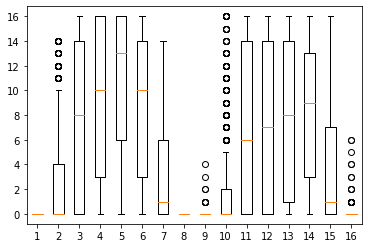

In [182]:
plt.boxplot(X[:,32:48])


{'whiskers': [<matplotlib.lines.Line2D at 0x2c04f797040>,
 'caps': [<matplotlib.lines.Line2D at 0x2c04f797700>,
 'boxes': [<matplotlib.lines.Line2D at 0x2c04f785ca0>,
 'medians': [<matplotlib.lines.Line2D at 0x2c04f797d90>,
 'fliers': [<matplotlib.lines.Line2D at 0x2c04f7a4100>,
 'means': []}

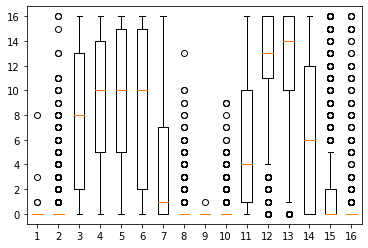

In [183]:
plt.boxplot(X[:,48:64])


We can see that the data is well situated and we dont need to normalize it to perform the boxplot

By looking at the boxplot we could think that there are outliers, in order to try and detect them we are going to perfomr the IRQ method that uses de first and third percentile to isolate the outliers. 
By doing this it does not mean that the outliers we detect has to be outliers we would have to analyze them to check to see if we need them or we do not.

In [184]:
# get the shape of the cancer dataframe
digits_df.shape

(1797, 65)

In [185]:
# get first Q
Q1 = digits_df.quantile(0.25)
# get third Q
Q3 = digits_df.quantile(0.75)
# get IRQ value for every feature
IQR = Q3 - Q1
print(IQR)

pixel_0_0     0.0
pixel_0_1     0.0
pixel_0_2     8.0
pixel_0_3     5.0
pixel_0_4     5.0
             ... 
pixel_7_4     6.0
pixel_7_5    12.0
pixel_7_6     2.0
pixel_7_7     0.0
class         5.0
Length: 65, dtype: float64


In [186]:
# print outliers in the dataframe
print((digits_df < (Q1 - 2 * IQR)) |(digits_df > (Q3 + 2 * IQR)))

      pixel_0_0  pixel_0_1  pixel_0_2  pixel_0_3  pixel_0_4  pixel_0_5  \
0         False      False      False      False      False      False   
1         False      False      False      False      False      False   
2         False      False      False      False      False      False   
3         False      False      False      False      False      False   
4         False      False      False      False      False      False   
...         ...        ...        ...        ...        ...        ...   
1792      False      False      False      False      False      False   
1793      False      False      False      False      False      False   
1794      False      False      False      False      False      False   
1795      False      False      False      False      False      False   
1796      False      False      False      False      False      False   

      pixel_0_6  pixel_0_7  pixel_1_0  pixel_1_1  ...  pixel_6_7  pixel_7_0  \
0         False      False      

In [187]:
# get the outliers in a different dataset
digits_outliers = digits_df[((digits_df < (Q1 - 2 * IQR)) |(digits_df > (Q3 + 2 * IQR))).any(axis=1)]

In [188]:
digits_outliers.shape

(1160, 65)

In [189]:
# get the original dataset without the outliers
digits_df_out = digits_df[~((digits_df < (Q1 - 2 * IQR)) |(digits_df > (Q3 + 2 * IQR))).any(axis=1)]

In [190]:
digits_df_out.shape

(637, 65)

As we can see this method is not a very good one to detect the outliers in this case, it takes too many datat as an outlier. In order to really detect them we could do a simple clustering detection as a K-Means or a SVC One class classification.

- In order to keep seen the data we are going to analyce how each feature affects to the diagnosis.

First we are going to add the y variable with the type of cancer to the features dataset

In [191]:
df_digits_corr = digits_df

In [192]:
df_digits_corr['class'] = y 
df_digits_corr

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,class
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0,1
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0,2
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0,3
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1792,0.0,0.0,4.0,10.0,13.0,6.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,2.0,14.0,15.0,9.0,0.0,0.0,9
1793,0.0,0.0,6.0,16.0,13.0,11.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,6.0,16.0,14.0,6.0,0.0,0.0,0
1794,0.0,0.0,1.0,11.0,15.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,9.0,13.0,6.0,0.0,0.0,8
1795,0.0,0.0,2.0,10.0,7.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,5.0,12.0,16.0,12.0,0.0,0.0,9


In [193]:
# Now lets get the correlation by looking at the class column
df_digits_corr.corr()

,pixel_0_0,pixel_0_1,pixel_0_2,pixel_0_3,pixel_0_4,pixel_0_5,pixel_0_6,pixel_0_7,pixel_1_0,pixel_1_1,...,pixel_6_7,pixel_7_0,pixel_7_1,pixel_7_2,pixel_7_3,pixel_7_4,pixel_7_5,pixel_7_6,pixel_7_7,class
pixel_0_0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pixel_0_1,NaN,1.000000,0.556618,0.207814,-0.018761,0.060776,0.048388,-0.038927,0.032320,0.556372,...,-0.045342,-0.007905,0.855610,0.555727,0.147646,-0.102349,-0.029870,0.026547,-0.043889,-0.051834
pixel_0_2,NaN,0.556618,1.000000,0.560180,-0.084235,0.043569,0.002841,-0.062278,0.022311,0.582259,...,-0.003804,-0.025837,0.515276,0.937623,0.499840,-0.134754,-0.041183,0.072599,0.082523,-0.011836
pixel_0_3,NaN,0.207814,0.560180,1.000000,0.023938,-0.171377,-0.115732,-0.040139,0.035663,0.328344,...,0.075335,-0.049085,0.175804,0.560326,0.767945,-0.065957,-0.054936,0.053437,0.081971,-0.011489
pixel_0_4,NaN,-0.018761,-0.084235,0.023938,1.000000,0.507731,0.127764,0.010065,0.042065,0.051657,...,-0.212220,0.017352,-0.047223,-0.020176,-0.008867,-0.082125,-0.215809,-0.250699,-0.215349,0.100801
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
pixel_7_4,NaN,-0.102349,-0.134754,-0.065957,-0.082125,-0.351146,-0.383522,-0.178243,0.048996,-0.000604,...,0.105101,0.005697,-0.117908,-0.207957,0.058390,1.000000,0.609515,0.243305,0.103015,-0.196083
pixel_7_5,NaN,-0.029870,-0.041183,-0.054936,-0.215809,-0.268818,-0.304111,-0.141174,0.033409,0.071488,...,0.262795,-0.003056,-0.043889,-0.091839,-0.094956,0.609515,1.000000,0.648328,0.261991,-0.079100
pixel_7_6,NaN,0.026547,0.072599,0.053437,-0.250699,-0.267659,-0.178945,-0.063220,0.020689,0.111569,...,0.511726,-0.011932,0.014557,0.035369,0.006849,0.243305,0.648328,1.000000,0.620428,-0.114007
pixel_7_7,NaN,-0.043889,0.082523,0.081971,-0.215349,-0.167727,-0.080309,-0.024505,-0.005226,-0.001404,...,0.563989,-0.004625,-0.047089,0.031193,0.099671,0.103015,0.261991,0.620428,1.000000,-0.181929


We can see how negative values affects in a negative way the type of the class, a positive value affects in a positive way in the class and a 0 value does not affects in the class


#### 3) Repeat each of the experiments seen in class with the K-Nearest Neighbors model, providing arguments for each of the steps taken along the process, and commenting on the partial results obtained with the selected dataset. Please use as many performance metrics as needed to illustrate the particularities of the selected dataset (e.g. imbalanced classes).

# K-Nearest using K-Fold (Not stratified)

Now let's use K-Neighbors model to classify and predict each sample of our dataset. First of all, is required the dataset split into train and test data. To do that, it is posisble to use the train_test_split model or the StratifiedShuffleSplit one. The StratifiedShuffleSplit model is used when the distribution of examples across the classes is not equal (imbalanced classes). In other words, an imbalance occurs when one or more classes have very low proportions in the training data as compared to the other classes. We are going to use both of them to see wich one is better.

We are also goint to see the cross validation method seen in class.

In [194]:
KF = KFold(n_splits = 5)
n_vecinos = 5

In [195]:
# declaring accuracies variable to store the acuracy of each strat
accuracies = []

for train_index, test_index in KF.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    clf = KNeighborsClassifier(n_neighbors=n_vecinos)

    #entreno el algoritmo con las particiones de train
    clf.fit(X_train,y_train)

    # Prediceme ahora la parte de test
    y_pred = clf.predict(X_test)
    
    accuracies.append(100.*sum(y_pred==y_test)/len(y_test))

In [196]:
#print balanced class
print("ejemplos para cada clase: ", collections.Counter(y_train))
    
#print numero de aciertos
print("Acierto: ",str(accuracies),"%")
#print media de aciertos
print("Acierto: ",str(np.mean(accuracies)),"%")

ejemplos para cada clase:  Counter({1: 146, 3: 146, 5: 145, 4: 144, 6: 144, 0: 143, 2: 143, 7: 143, 9: 143, 8: 141})
Acierto:  [95.0, 96.38888888888889, 96.37883008356546, 98.05013927576601, 96.37883008356546] %
Acierto:  96.43933766635716 %


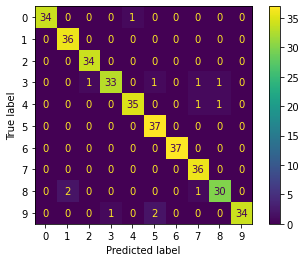

In [197]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf,X_test,y_test)

Just by doing a K-flod validation followed by a KNN model we can see that the acuraccy is very good. Lest see if we can make it better with stratified k-fold validation.

# K-Nearest using Strattified Shuffle Split (Stratified K-Fold)

#### n_splits = 10 n_vecinos = 5

In [198]:
# First we create the splits we want for the training of the dataset and the number of neighbors for the KNN model 
sss = StratifiedShuffleSplit(n_splits=10,test_size=0.1,random_state=0)
n_vecinos = 5

In [199]:
# declaring accuracies variable to store the acuracy of each strat
accuracies = []

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    clf = KNeighborsClassifier(n_neighbors=n_vecinos)

    #entreno el algoritmo con las particiones de train
    clf.fit(X_train,y_train)

    # Prediceme ahora la parte de test
    y_pred = clf.predict(X_test)
    
    accuracies.append(100.*sum(y_pred==y_test)/len(y_test))

In [200]:
#print balanced class
print("ejemplos para cada clase: ", collections.Counter(y_train))
    
#print numero de aciertos
print("Acierto: ",str(accuracies),"%")
#print media de aciertos
print("Acierto: ",str(np.mean(accuracies)),"%")

ejemplos para cada clase:  Counter({3: 165, 5: 164, 1: 164, 6: 163, 4: 163, 9: 162, 7: 161, 0: 160, 2: 159, 8: 156})
Acierto:  [98.88888888888889, 97.77777777777777, 98.33333333333333, 98.33333333333333, 98.88888888888889, 97.77777777777777, 98.88888888888889, 99.44444444444444, 99.44444444444444, 100.0] %
Acierto:  98.77777777777777 %


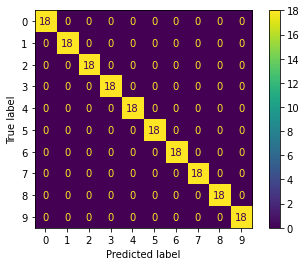

In [201]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf,X_test,y_test)

##### n_splits = 10 n_vecinos = 3 

In [202]:
sss = StratifiedShuffleSplit(n_splits=10,test_size=0.1,random_state=0)
n_vecinos = 3

In [203]:
# declaring accuracies variable to store the acuracy of each strat
accuracies = []

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    clf = KNeighborsClassifier(n_neighbors=n_vecinos)

    #entreno el algoritmo con las particiones de train
    clf.fit(X_train,y_train)

    # Prediceme ahora la parte de test
    y_pred = clf.predict(X_test)
    
    accuracies.append(100.*sum(y_pred==y_test)/len(y_test))

In [204]:
#print balanced class
print("ejemplos para cada clase: ", collections.Counter(y_train))
    
#print numero de aciertos
print("Acierto: ",str(accuracies),"%")
#print media de aciertos
print("Acierto: ",str(np.mean(accuracies)),"%")


ejemplos para cada clase:  Counter({3: 165, 5: 164, 1: 164, 6: 163, 4: 163, 9: 162, 7: 161, 0: 160, 2: 159, 8: 156})
Acierto:  [99.44444444444444, 97.77777777777777, 98.33333333333333, 98.33333333333333, 98.33333333333333, 98.33333333333333, 98.88888888888889, 98.88888888888889, 99.44444444444444, 99.44444444444444] %
Acierto:  98.72222222222223 %


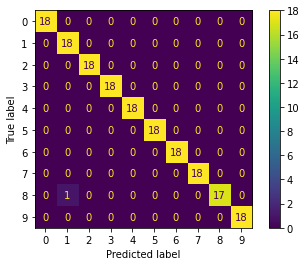

In [205]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf,X_test,y_test)

##### n_splits = 10 n_vecinos = 15

In [206]:
sss = StratifiedShuffleSplit(n_splits=10,test_size=0.1,random_state=0)
n_vecinos = 15

In [207]:
# declaring accuracies variable to store the acuracy of each strat
accuracies = []

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    clf = KNeighborsClassifier(n_neighbors=n_vecinos)

    #entreno el algoritmo con las particiones de train
    clf.fit(X_train,y_train)

    # Prediceme ahora la parte de test
    y_pred = clf.predict(X_test)
    
    accuracies.append(100.*sum(y_pred==y_test)/len(y_test))

In [208]:
#print balanced class
print("ejemplos para cada clase: ", collections.Counter(y_train))
    
#print numero de aciertos
print("Acierto: ",str(accuracies),"%")
#print media de aciertos
print("Acierto: ",str(np.mean(accuracies)),"%")

ejemplos para cada clase:  Counter({3: 165, 5: 164, 1: 164, 6: 163, 4: 163, 9: 162, 7: 161, 0: 160, 2: 159, 8: 156})
Acierto:  [97.22222222222223, 97.77777777777777, 97.22222222222223, 98.33333333333333, 95.55555555555556, 97.22222222222223, 98.88888888888889, 99.44444444444444, 96.66666666666667, 98.33333333333333] %
Acierto:  97.66666666666666 %


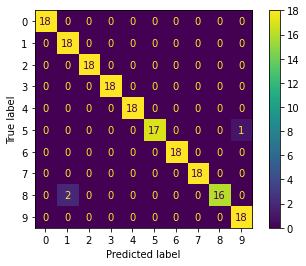

In [209]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf,X_test,y_test)

##### n_splits = 5 n_vecinos = 15

In [210]:
sss = StratifiedShuffleSplit(n_splits=5,test_size=0.1,random_state=0)
n_vecinos = 15

In [211]:
# declaring accuracies variable to store the acuracy of each strat
accuracies = []

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    clf = KNeighborsClassifier(n_neighbors=n_vecinos)

    #entreno el algoritmo con las particiones de train
    clf.fit(X_train,y_train)

    # Prediceme ahora la parte de test
    y_pred = clf.predict(X_test)
    
    accuracies.append(100.*sum(y_pred==y_test)/len(y_test))

In [212]:
#print balanced class
print("ejemplos para cada clase: ", collections.Counter(y_train))
    
#print numero de aciertos
print("Acierto: ",str(accuracies),"%")
#print media de aciertos
print("Acierto: ",str(np.mean(accuracies)),"%")

ejemplos para cada clase:  Counter({3: 165, 1: 164, 5: 164, 4: 163, 6: 163, 9: 162, 7: 161, 0: 160, 2: 159, 8: 156})
Acierto:  [97.22222222222223, 97.77777777777777, 97.22222222222223, 98.33333333333333, 95.55555555555556] %
Acierto:  97.22222222222221 %


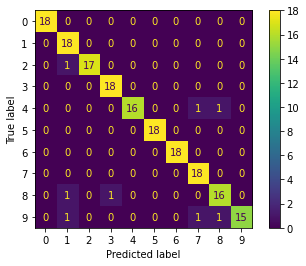

In [213]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf,X_test,y_test)

##### n_splits = 3 n_vecinos = 3

In [214]:
sss = StratifiedShuffleSplit(n_splits=3,test_size=0.1,random_state=0)
n_vecinos = 3

In [215]:
# declaring accuracies variable to store the acuracy of each strat
accuracies = []

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    clf = KNeighborsClassifier(n_neighbors=n_vecinos)

    #entreno el algoritmo con las particiones de train
    clf.fit(X_train,y_train)

    # Prediceme ahora la parte de test
    y_pred = clf.predict(X_test)
    
    accuracies.append(100.*sum(y_pred==y_test)/len(y_test))

In [216]:
#print balanced class
print("ejemplos para cada clase: ", collections.Counter(y_train))
    
#print numero de aciertos
print("Acierto: ",str(accuracies),"%")
#print media de aciertos
print("Acierto: ",str(np.mean(accuracies)),"%")

ejemplos para cada clase:  Counter({3: 165, 1: 164, 5: 164, 4: 163, 6: 163, 9: 162, 7: 161, 0: 160, 2: 159, 8: 156})
Acierto:  [99.44444444444444, 97.77777777777777, 98.33333333333333] %
Acierto:  98.51851851851852 %


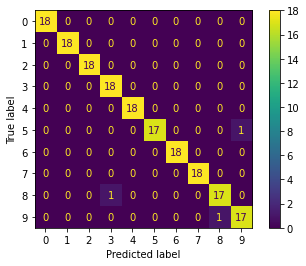

In [217]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf,X_test,y_test)

**Conclusion**

As we can see we get a much better result than only using K-Fold validation, even tho our data is well balanced.

K-Fold validation 96.43933 %

Stratified K-Fold validation 98.777 %


# K-Nearest using Cross Validation


In this case we are going to use the cross validation

In [273]:
# we create one strat for the cross validation because the data is unbalanced 
sss = StratifiedShuffleSplit(n_splits=1,test_size=0.1,random_state=0)

In [274]:
# we set the train test split
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [275]:
# we set some diferent neighbors values so that the gridsearch method can find the mos apropied
params =  {'n_neighbors' : [3,5,9,11,13]}

In [276]:
from sklearn.model_selection import GridSearchCV
clf = KNeighborsClassifier()
gs = GridSearchCV(estimator=clf,param_grid=params,scoring='accuracy',cv=5)
gs.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 9, 11, 13]}, scoring='accuracy')

In [277]:
resultsCV = gs.cv_results_
# we get the best convination of the grid search
clfBest = gs.best_estimator_
# we train the model with the best convination
clfBest.fit(X_train,y_train)
# we predict the value separated in the train test fase
y_pred = clfBest.predict(X_test)

In [278]:
#printing the best combination of parameters
gs.cv_results_

{'mean_fit_time': array([0.01441417, 0.01419129, 0.01458344, 0.0142086 , 0.01718478]),
 'std_fit_time': array([0.00100363, 0.00040354, 0.00049726, 0.00038436, 0.00542789]),
 'mean_score_time': array([0.04700098, 0.05000091, 0.04602075, 0.04580865, 0.05079298]),
 'std_score_time': array([0.00283321, 0.00807557, 0.00063525, 0.00117335, 0.00531488]),
 'param_n_neighbors': masked_array(data=[3, 5, 9, 11, 13],
              mask=[False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'n_neighbors': 3},
  {'n_neighbors': 5},
  {'n_neighbors': 9},
  {'n_neighbors': 11},
  {'n_neighbors': 13}],
 'split0_test_score': array([0.98765432, 0.98148148, 0.97839506, 0.97530864, 0.97839506]),
 'split1_test_score': array([0.98148148, 0.9845679 , 0.98765432, 0.98148148, 0.9845679 ]),
 'split2_test_score': array([0.98452012, 0.9876161 , 0.98142415, 0.97832817, 0.97832817]),
 'split3_test_score': array([0.98452012, 0.9876161 , 0.98452012, 0.98142415, 0.9752322 

In [280]:
gs.best_params_

{'n_neighbors': 5}

In [224]:
from sklearn.metrics import accuracy_score

print('Acuracy score is: ',accuracy_score(y_test, y_pred))

Acuracy score is:  0.9888888888888889


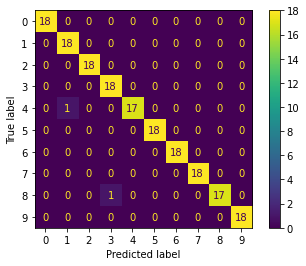

In [225]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clfBest,X_test,y_test)

In [226]:
#print balanced class
print("ejemplos para cada clase: ", collections.Counter(y_train))

ejemplos para cada clase:  Counter({3: 165, 1: 164, 5: 164, 4: 163, 6: 163, 9: 162, 7: 161, 0: 160, 2: 159, 8: 156})


- #### Precision score : it indicates how accurate the positive predictions are 

In [227]:
from sklearn.metrics import precision_score
print('precision score is: ',precision_score(y_test, y_pred,average='macro'))

precision score is:  0.9894736842105264


- #### Recall score : it is thhe coverage of actual positive samples 

In [228]:
from sklearn.metrics import recall_score
print('recall score is: ',recall_score(y_test, y_pred,average='macro'))

recall score is:  0.9888888888888889


- #### Hybrid metric, usefull for unbalanced classes as it happens in this case 

In [229]:
from sklearn.metrics import f1_score
print('f1 score is: ',f1_score(y_test, y_pred,average='macro'))

f1 score is:  0.9888803088803089


**Conclusion**

As it was to be spected because of the balanced class we get a better result by using cross validation

K-Fold validation 96.43933 %

Stratified K-Fold validation 98.777 %

Cross validation 98.888%

#### 4) Read the Scikit-learn library documentation and configure the automated validation script so that the GridSearchCV() function uses leave-one-out cross-validation instead of k-fold. Which conclusions can be drawn from the mean cross-validation scores and the test scores using a k-neighbor model with optimized k?

# K-Nearest Neighbors using leave one out cross validation

- In this case we are going to do a cross validation but using leave one out instead of the k-fold method

In [230]:
# we import the leave on eout method
from sklearn.model_selection import LeaveOneOut
LOO = LeaveOneOut()

In [231]:
# we create one strat for the cross validation because the data is unbalanced 
sss = StratifiedShuffleSplit(n_splits=1,test_size=0.1,random_state=0)

In [232]:
# we set the train test split
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]


In [233]:
# get the bests neighbors param for grid search
params =  {'n_neighbors' : [3,5,9,11,13]}

In [234]:
clf = KNeighborsClassifier()
gs = GridSearchCV(estimator=clf,param_grid=params,scoring='accuracy',cv=LOO)
gs.fit(X_train,y_train)

GridSearchCV(cv=LeaveOneOut(), estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 9, 11, 13]}, scoring='accuracy')

In [235]:
resultsCV = gs.cv_results_
#cogemos la mejor combinacion
clfBest = gs.best_estimator_
#entreno con la mejor combinacion
clfBest.fit(X_train,y_train)
#predigo con este entrenamiento
y_pred = clfBest.predict(X_test)

In [236]:
#printing the best combination of parameters
clfBest

KNeighborsClassifier()

In [237]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

0.9888888888888889


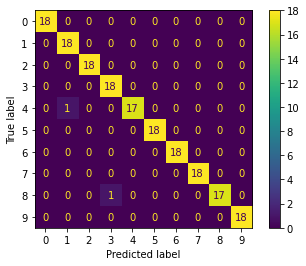

In [238]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clfBest,X_test,y_test)

**Conclusions:**

LeaveOneOut results are the same as the cross-validation results with optimized k (K=5).In both we get a 98.888% accuracy.

#### 5) Elaborate on the need for stratifying the cross-validation process analyzing the distribution of samples by class. If so, please show with empirical evidence what could occur if such a stratification was not performed, specially when decreasing the number of samples of the dataset.

# KNN method with not stratified cross validation


In [239]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.4,random_state=0)

In [240]:
params =  {'n_neighbors' : [3,5,9,11,13]}

In [241]:
clf = KNeighborsClassifier()

gs = GridSearchCV(estimator=clf,param_grid=params,scoring='accuracy',cv=5)

gs.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 9, 11, 13]}, scoring='accuracy')

In [242]:
resultsCV = gs.cv_results_

#cogemos la mejor combinacion
clfBest = gs.best_estimator_

#entreno con la mejor combinacion
clfBest.fit(X_train,y_train)

#predigo con este entrenamiento
y_pred = clfBest.predict(X_test)

In [281]:
#print best params selected
gs.best_params_

{'n_neighbors': 5}

In [248]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

0.9791376912378303


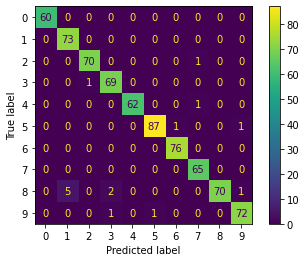

In [249]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clfBest,X_test,y_test)

**Conclusion**

Not stratified = 97.9137% accuracy (k=5)

stratified = 98.888%% accuracy (k=5)

As we could predict by using not stratiffied cross validation we get a worst result this is because the clases are not perfectly balanced and if we dont stratiffy our data the model migth not be getting a adecuate number of data for both classes. the results could be even worst if we decreased the amount of data we have abaliable because the test train split could be even more unbalanaced.

#### 6) Include in the set of hyper-parameters adjusted via cross-validation process the weights of the distance metric between samples according to the “weights” parameter of the model in Scikit-learn. Compute the model’s performance when distance metric weights are fine-tuned within cross-validation with respect to only tuning the number of neighbors (K).

To solve this section we only have to compare the model accuracy using GridSearchCV without 'uniform' in the 'weights' parameter with the accuracy using 'distance' in 'weights' parameter.

# KNN using cross validation adding weights


In [282]:
sss = StratifiedShuffleSplit(n_splits=1,test_size=0.1,random_state=0)

In [283]:
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [284]:
params =  {'n_neighbors' : [3,5,9,11,13], 'weights' : ['uniform','distance']}

In [285]:
clf = KNeighborsClassifier()

gs = GridSearchCV(estimator=clf,param_grid=params,scoring='accuracy',cv=5)

gs.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 9, 11, 13],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [286]:
resultsCV = gs.cv_results_

#cogemos la mejor combinacion
clfBest = gs.best_estimator_

#entreno con la mejor combinacion
clfBest.fit(X_train,y_train)

#predigo con este entrenamiento
y_pred = clfBest.predict(X_test)

In [287]:
#printing the best combination of parameters
clfBest

KNeighborsClassifier(weights='distance')

In [288]:
gs.best_params_

{'n_neighbors': 5, 'weights': 'distance'}

In [289]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

0.9944444444444445


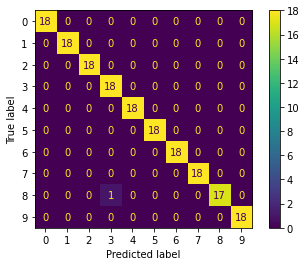

In [290]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clfBest,X_test,y_test)

**Conclusions:**

the model's performance for an optimal number of neighbors (k = 5) and weights distance is 99.4444% way better than the one we got before because when we dont specify the wigths params it takes 'uniform' as defalut.

#### 7) Following the same approach as in the last section, enter the type of distance metric (“metric” parameter) within the cross-validation process. Evaluates the results and gains / losses of generalizability of the model.

# KNN cross validation adding weights and metrics

In [309]:
sss = StratifiedShuffleSplit(n_splits=1,test_size=0.1,random_state=0)

In [310]:
for train_index, test_index in sss.split(X, y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

In [311]:
params =  {'n_neighbors' : [3,5,9,11,13], 'weights' : ['uniform','distance'],'p' : [1,2,3,4]}

In [312]:
clf = KNeighborsClassifier()

gs = GridSearchCV(estimator=clf,param_grid=params,scoring='accuracy',cv=5)

gs.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 9, 11, 13], 'p': [1, 2, 3, 4],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [313]:
resultsCV = gs.cv_results_

#cogemos la mejor combinacion
clfBest = gs.best_estimator_

#entreno con la mejor combinacion
clfBest.fit(X_train,y_train)

#predigo con este entrenamiento
y_pred = clfBest.predict(X_test)

In [314]:
#printing the best combination of parameters
clfBest

KNeighborsClassifier(n_neighbors=3, p=4, weights='distance')

In [315]:
gs.best_params_

{'n_neighbors': 3, 'p': 4, 'weights': 'distance'}

In [316]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test, y_pred))

0.9833333333333333


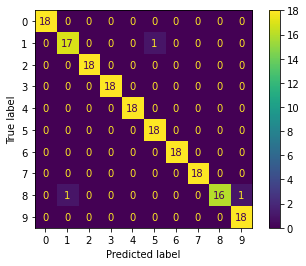

In [317]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clfBest,X_test,y_test)

**Conclusions:**

the model's performance for an optimal number of neighbors (k = 3), weights 'distance' and p '4' is 98.3333% so in this case adding the 'p' param made our model acuracy´s worst than in the case before.